In [1]:
import pandas as pd
import os 
import glob 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
path_filtered = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_merged3_372a147_medium_run_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/commit_372a147_full_flags_GTEXcore/G_TCGA-BH-A18V-01A-11R-A12D-07.all_ref_SampleLim0.0CohortLim0.0Across1_FiltNormalsGtexcoreCohortlim0.0Across0.tsv/part-00000-c554ddd4-74fd-4040-8c55-fb27edde84cc-c000.csv'

In [3]:
path_cancer = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/commit_v3_TEST_merged3_372a147_medium_run_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/commit_372a147_full_flags_a_interm_cancer/interm_cancer_ref_combiExprCohortLim0.0Across1ExceptTCGABHA18V01A11RA12D07all.tsv/'

In [10]:
path_cancers = glob.glob(path_cancer + '*part*')

In [25]:
cancers = [pd.read_csv(path, sep = '\t', header = None) for path in path_cancers ]

cancers = pd.concat(cancers, axis = 0).rename( {0:'kmer', 1:'recurrence'}, axis = 1)

In [26]:
cancers.head()

,kmer,recurrence
0,QVPTSPVPG,47
1,NNNCPDRLP,109
2,PQVPGPPCA,29
3,RHLYQGCQD,1
4,QQIKEEESD,82


In [ ]:
cancers = cancers.rename({})

In [6]:
filtered = pd.read_csv(path_filtered, sep = '\t')

In [7]:
filtered.head()

,kmer,TCGABHA18V01A11RA12D07all,junctionAnnotated,readFrameAnnotated
0,DINLNSPVD,1.0,1.0,1.0
1,PSHLLKRSR,7050.0,1.0,1.0
2,SALMQVHVT,28.0,1.0,1.0
3,WVWSEKSNL,79.0,1.0,1.0
4,LVCGLFHQQ,145.0,1.0,1.0


(array([1.384e+03, 3.900e+01, 1.400e+01, 1.500e+01, 2.300e+01, 8.000e+00,
        6.000e+00, 1.000e+00, 1.000e+00, 6.000e+00]),
 array([1.00000e+00, 1.14920e+03, 2.29740e+03, 3.44560e+03, 4.59380e+03,
        5.74200e+03, 6.89020e+03, 8.03840e+03, 9.18660e+03, 1.03348e+04,
        1.14830e+04]),
 <BarContainer object of 10 artists>)

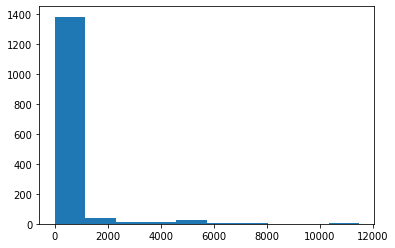

In [8]:
plt.hist(filtered['TCGABHA18V01A11RA12D07all'])

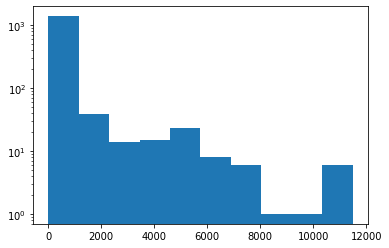

In [9]:
plt.hist(filtered['TCGABHA18V01A11RA12D07all'])
plt.yscale('log')